In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


# Any results you write to the current directory are saved as output.

In [4]:
df_cluster = pd.read_csv('C:\\Users\\Pushkar\\OneDrive - The University of Kansas\\Test_DS_col\\mergedData.csv')

In [5]:
# divided the TempGlobal i.e. the continuous data into 3 bins and created a new column i.e. TempGlobal_bins
df_cluster_disct = df_cluster.copy(deep=True)
df_cluster_disct['TempGlobal_bins']=pd.cut(df_cluster_disct['TempGlobal'], 3,labels=["Low", "Medium", "High"])

In [6]:
df_cluster_disct.head(5)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low


In [7]:
#[(14.775, 15.204] = Low
# (15.204, 15.631] = Medium
# (15.631, 16.059]] = High

pd.cut(df_cluster_disct['TempGlobal'], 3).head()

0    (14.775, 15.204]
1    (14.775, 15.204]
2    (14.775, 15.204]
3    (14.775, 15.204]
4    (14.775, 15.204]
Name: TempGlobal, dtype: category
Categories (3, interval[float64]): [(14.775, 15.204] < (15.204, 15.631] < (15.631, 16.059]]

In [10]:
df_cluster_disct.drop(['year','TempGlobal','TempLand'],axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

In [11]:
df_cluster_disct.head()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal_bins
0,-130.1,5727.78236,180.5557,63.88894,1880.29881,Low
1,-130.5,5727.78236,180.5557,63.88894,1942.99709,Low
2,-125.9,5727.78236,180.5557,63.88894,1996.90205,Low
3,-117.9,5727.78236,180.5557,63.88894,2186.94199,Low
4,-128.2,5727.78236,180.5557,63.88894,2202.66794,Low


C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


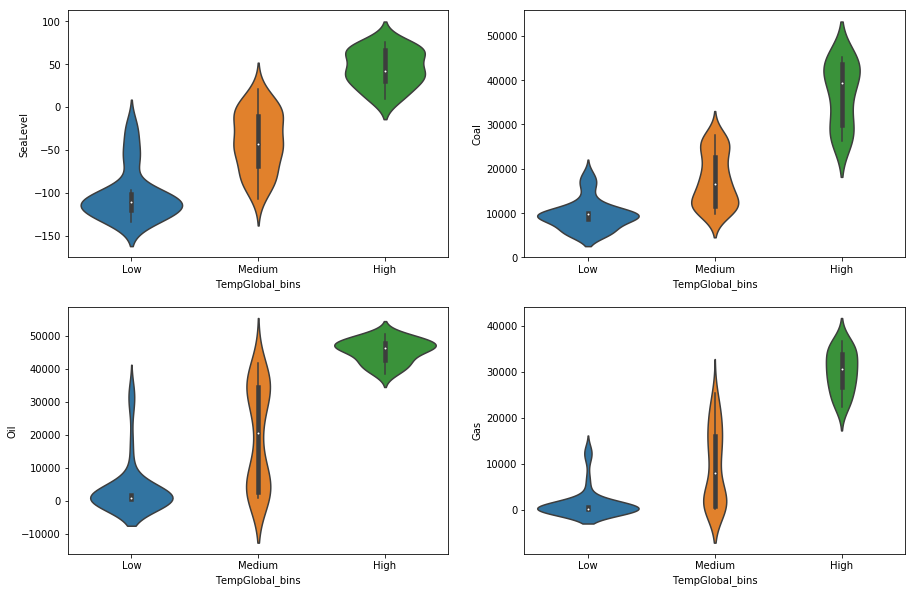

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='TempGlobal_bins',y='SeaLevel',data=df_cluster_disct)
plt.subplot(2,2,2)
sns.violinplot(x='TempGlobal_bins',y='Coal',data=df_cluster_disct)
plt.subplot(2,2,3)
sns.violinplot(x='TempGlobal_bins',y='Oil',data=df_cluster_disct)
plt.subplot(2,2,4)
sns.violinplot(x='TempGlobal_bins',y='Gas',data=df_cluster_disct)


C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


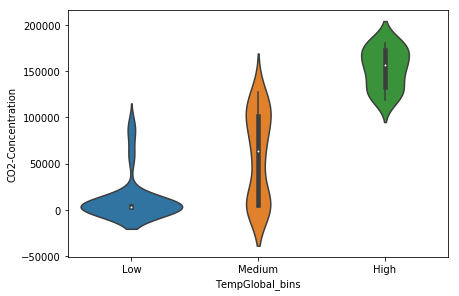

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='TempGlobal_bins',y='CO2-Concentration',data=df_cluster_disct)

In [16]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


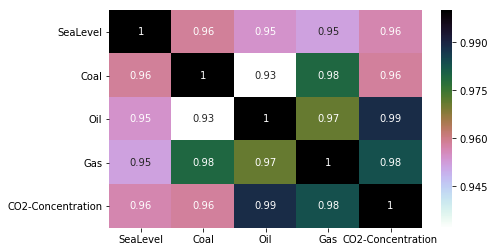

In [17]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df_cluster_disct.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [18]:
train, test = train_test_split(df_cluster_disct, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(81, 6)
(35, 6)


In [21]:
train_X = train[['SeaLevel','CO2-Concentration','Gas','Coal','Oil']]# taking the training data features
train_y=train.TempGlobal_bins# output of our training data
test_X= test[['SeaLevel','CO2-Concentration','Gas','Coal','Oil']] # taking test data features
test_y =test.TempGlobal_bins   #output value of test data

In [22]:
train_X.head(2)

,SeaLevel,CO2-Concentration,Gas,Coal,Oil
97,20.6,123114.31000,23390.79648,26868.04001,40179.75478
76,-22.3,92532.99141,13084.99176,18888.19275,33436.49447


In [23]:
test_X.head(2)

,SeaLevel,CO2-Concentration,Gas,Coal,Oil
102,28.4,131230.950,26518.27189,29258.89831,42509.72115
26,-106.7,3546.688,233.33352,9833.34120,888.88960


In [24]:
train_y.head()  ##output of the training data

97       High
76        Low
112      High
86     Medium
115      High
Name: TempGlobal_bins, dtype: category
Categories (3, object): [Low < Medium < High]

In [25]:
# Support Vector Machine (SVM)

In [26]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.3142857142857143


In [27]:
# Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.7714285714285715


In [29]:
# Decision Tree

In [30]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.7714285714285715


In [31]:
# K-Nearest Neighbours

In [32]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.7428571428571429


In [33]:
# Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x1e9c1787588>,
 <a list of 10 Text xticklabel objects>)

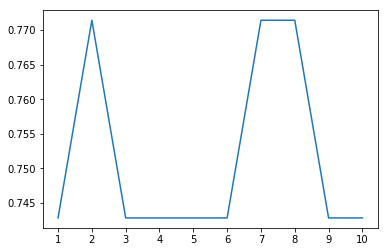

In [34]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [ ]:
# Above is the graph showing the accuracy for the KNN models using different values of n.